In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
p = 0.8
X = st.bernoulli.rvs(p)
print(X)

1


In [3]:
n = 1_000_000
X_draws = st.bernoulli.rvs(p, size=n)
print(X_draws.mean()) # 计数 1 的数量并除以 n

0.799944


In [4]:
p = 0.3
X_draws = st.bernoulli.rvs(p, size=n)
print(X_draws.mean())

0.299925


In [5]:
def draw_means(X_distribution,  # 每个 X_i 的分布
               n):              # 样本均值的大小

    # 生成 n 个抽样：X_1, ..., X_n
    X_samples = X_distribution.rvs(size=n)

    # 返回样本均值
    return np.mean(X_samples)

In [6]:
def generate_histogram(X_distribution, n, m): 

    # 计算 m 个样本均值

    sample_means = np.empty(m)
    for j in range(m):
        sample_means[j] = draw_means(X_distribution, n) 

    # 生成直方图

    fig, ax = plt.subplots()
    ax.hist(sample_means, bins=30, alpha=0.5, density=True)
    μ = X_distribution.mean()  # 获取总体均值
    σ = X_distribution.std()    # 以及标准差
    ax.axvline(x=μ, ls="--", c="k", label=fr"$\mu = {μ}$")
     
    ax.set_xlim(μ - σ, μ + σ)
    ax.set_xlabel(r'$\bar X_n$', size=12)
    ax.set_ylabel('密度', size=12)
    ax.legend()
    plt.show()

/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/humphrey/anaconda3/envs/quantecon/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


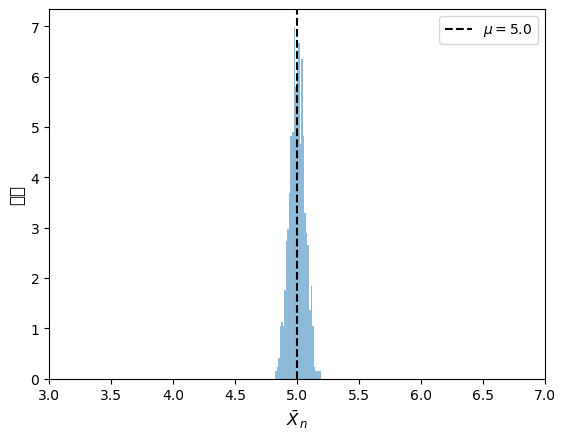

In [7]:
# 选择一个分布来绘制每个 $X_i$
X_distribution = st.norm(loc=5, scale=2) 
# 调用函数
generate_histogram(X_distribution, n=1_000, m=1000)

In [8]:
def means_violin_plot(distribution,  
                      ns = [1_000, 10_000, 100_000],
                      m = 10_000):

    data = []
    for n in ns:
        sample_means = [draw_means(distribution, n) for i in range(m)]
        data.append(sample_means)

    fig, ax = plt.subplots()

    ax.violinplot(data)
    μ = distribution.mean()
    ax.axhline(y=μ, ls="--", c="k", label=fr"$\mu = {μ}$")

    labels=[fr'$n = {n}$' for n in ns]

    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)


    plt.subplots_adjust(bottom=0.15, wspace=0.05)

    ax.set_ylabel('密度', size=12)
    ax.legend()
    plt.show()

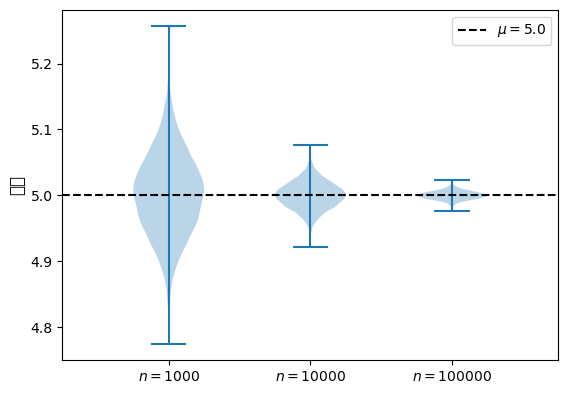

In [9]:
means_violin_plot(st.norm(loc=5, scale=2))

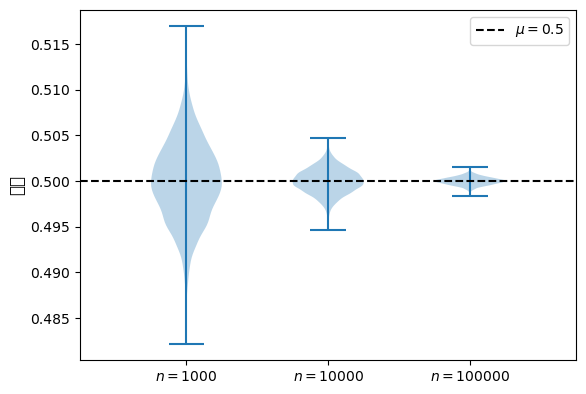

In [10]:
means_violin_plot(st.beta(6, 6))

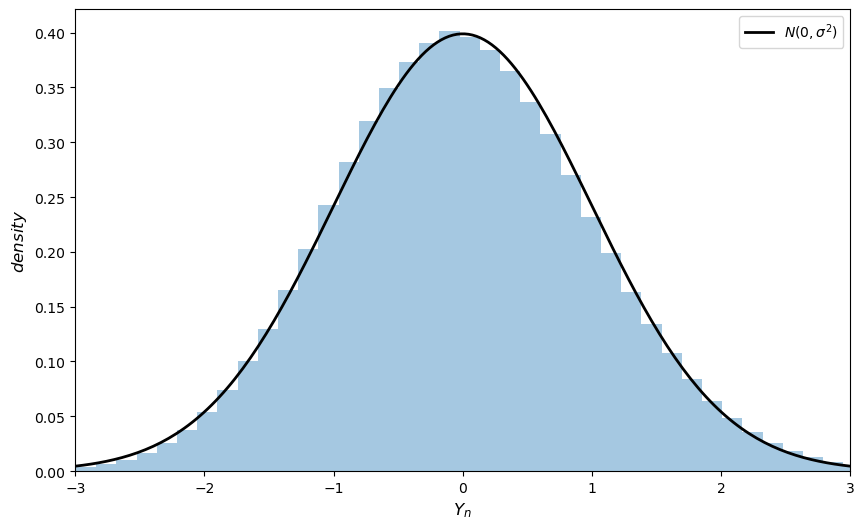

In [11]:
# 设置参数
n = 250         # 选择 n
k = 1_000_000        # Y_n 的抽样次数
distribution = st.expon(2) # 指数分布，λ = 1/2
μ, σ = distribution.mean(), distribution.std()

# 抽取底层随机变量。每一行包含一次 X_1,..,X_n 的抽取
data = distribution.rvs((k, n))
# 计算每一行的均值，生成 k 次 \bar X_n 的抽取
sample_means = data.mean(axis=1)
# 生成 Y_n 的观测
Y = np.sqrt(n) * (sample_means - μ)

# 绘图
fig, ax = plt.subplots(figsize=(10, 6))
xmin, xmax = -3 * σ, 3 * σ
ax.set_xlim(xmin, xmax)
ax.hist(Y, bins=60, alpha=0.4, density=True)
xgrid = np.linspace(xmin, xmax, 200)
ax.plot(xgrid, st.norm.pdf(xgrid, scale=σ), 
        'k-', lw=2, label='$N(0, \sigma^2)$')
ax.set_xlabel(r"$Y_n$", size=12)
ax.set_ylabel(r"$density$", size=12)

ax.legend()

plt.show()

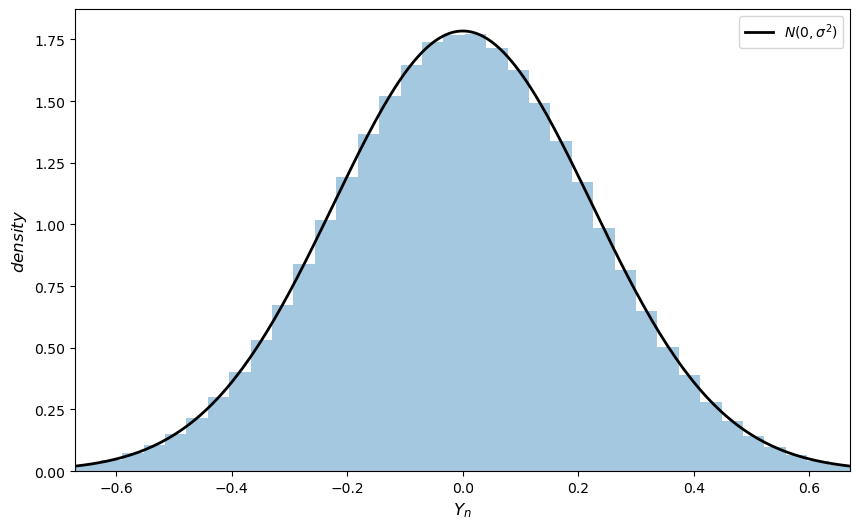

In [12]:
# 设置参数
n = 250         # 选择 n
k = 1_000_000        # Y_n 的抽样次数
distribution = st.beta(2,2) # 我们选择 Beta(2, 2) 作为例子
μ, σ = distribution.mean(), distribution.std()

# 抽取底层随机变量。每一行包含一次 X_1,..,X_n 的抽取
data = distribution.rvs((k, n))
# 计算每一行的均值，生成 k 次 \bar X_n 的抽取
sample_means = data.mean(axis=1)
# 生成 Y_n 的观测
Y = np.sqrt(n) * (sample_means - μ)

# 绘图
fig, ax = plt.subplots(figsize=(10, 6))
xmin, xmax = -3 * σ, 3 * σ
ax.set_xlim(xmin, xmax)
ax.hist(Y, bins=60, alpha=0.4, density=True)
ax.set_xlabel(r"$Y_n$", size=12)
ax.set_ylabel(r"$density$", size=12)
xgrid = np.linspace(xmin, xmax, 200)
ax.plot(xgrid, st.norm.pdf(xgrid, scale=σ), 'k-', lw=2, label='$N(0, \sigma^2)$')
ax.legend()

plt.show()

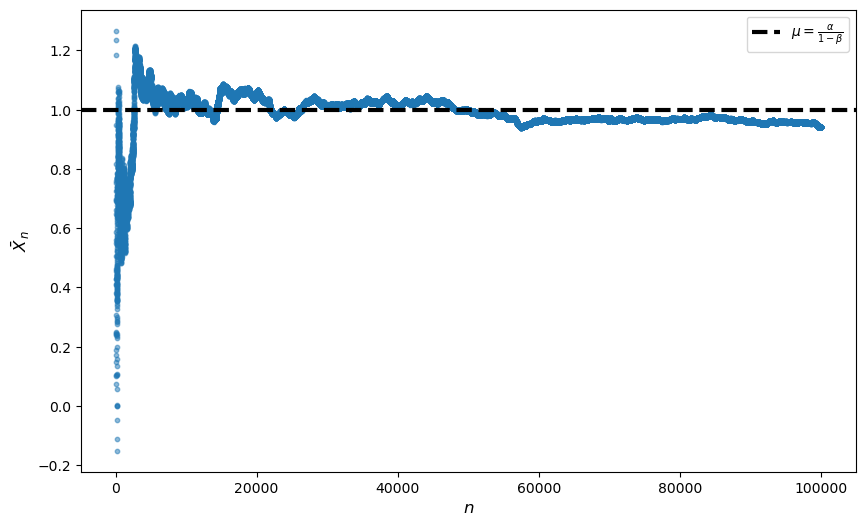

In [13]:
σ = 10
α = 0.8
β = 0.2
n = 100_000

fig, ax = plt.subplots(figsize=(10, 6))
x = np.ones(n)
x[0] = st.norm.rvs(α/(1-β), α**2/(1-β**2))
ϵ = st.norm.rvs(size=n+1)
means = np.ones(n)
means[0] = x[0]
for t in range(n-1):
    x[t+1] = α + β * x[t] + σ * ϵ[t+1]
    means[t+1] = np.mean(x[:t+1])


ax.scatter(range(100, n), means[100:n], s=10, alpha=0.5)

ax.set_xlabel(r"$n$", size=12)
ax.set_ylabel(r"$\bar X_n$", size=12)
yabs_max = max(ax.get_ylim(), key=abs)
ax.axhline(y=α/(1-β), ls="--", lw=3, 
           label=r"$\mu = \frac{\alpha}{1-\beta}$", 
           color = 'black')

plt.legend()
plt.show()